In [1]:
#Python3.6
#Anaconda environment
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")
display(data[:10])

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [2]:
# Display a description of the dataset
display(data.describe())
#display(data.corr())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [60,120,400]
# indices = [0:10],[100:300],[:15] --> indices are not slices.. lol

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)


print ("Chosen samples of wholesale customers dataset: --\n --'Samples', --\n--> ")
display(samples)
min = np.min(samples)
print('****samples min \n')
display(min)
max = np.max(samples)
print('\n ****sameples max \n')
display(max)
mean = np.mean(samples)
print('\n ***samples average \n')
display(mean)
median= np.median(samples)
print('\n ***samples median \n')
display(median)
display(samples - np.round(data.mean()))
display(samples - np.round(data.median()))

Chosen samples of wholesale customers dataset: --
 --'Samples', --
--> 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8590,3045,7854,96,4095,225
1,17160,1200,3412,2417,174,1136
2,4446,906,1238,3576,153,1014


****samples min 



Fresh               4446
Milk                 906
Grocery             1238
Frozen                96
Detergents_Paper     153
Delicatessen         225
dtype: int64


 ****sameples max 



Fresh               17160
Milk                 3045
Grocery              7854
Frozen               3576
Detergents_Paper     4095
Delicatessen         1136
dtype: int64


 ***samples average 



Fresh               10065.333333
Milk                 1717.000000
Grocery              4168.000000
Frozen               2029.666667
Detergents_Paper     1474.000000
Delicatessen          791.666667
dtype: float64


 ***samples median 



1827.5

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-3410.0,-2751.0,-97.0,-2976.0,1214.0,-1300.0
1,5160.0,-4596.0,-4539.0,-655.0,-2707.0,-389.0
2,-7554.0,-4890.0,-6713.0,504.0,-2728.0,-511.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,86.0,-582.0,3098.0,-1430.0,3279.0,-741.0
1,8656.0,-2427.0,-1344.0,891.0,-642.0,170.0
2,-4058.0,-2721.0,-3518.0,2050.0,-663.0,48.0


In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
Deter = data['Detergents_Paper'] #-->target variable
new_deter = data.drop(['Detergents_Paper'], axis = 1)
import sklearn
from sklearn.model_selection import train_test_split
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_deter, 
                                     Deter, 
                                     test_size = 0.25,
                                     random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 12)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print('Score:-> {:.4f} '.format(score))

Score:-> 0.4824 


**Answer:

I selected the Detergents_Paper  feature  for prediction because every other features score had a negative score compared to Detergents_Paper that had a score of .4824 making it an appropriate target variable for prediction because the score tends to generate a model that will fit the data and generate an accurate prediction.

This makes it an important feature for identifying customer spending habits and a good variable for generating predictions 

**

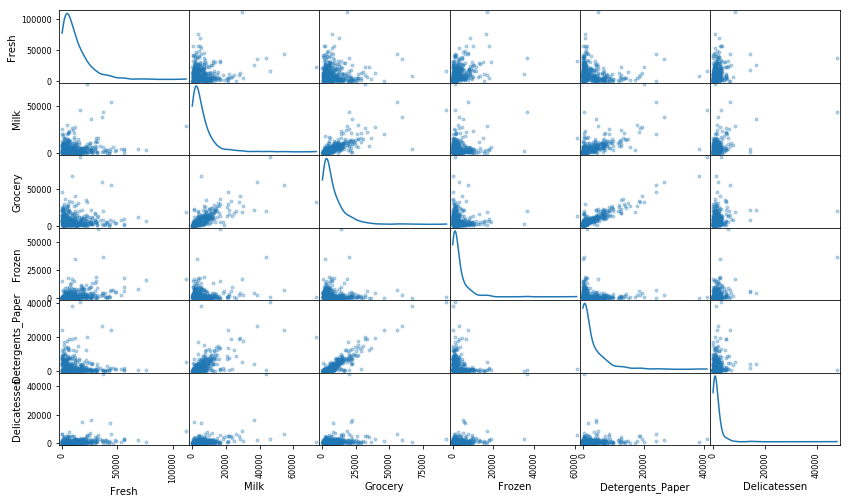

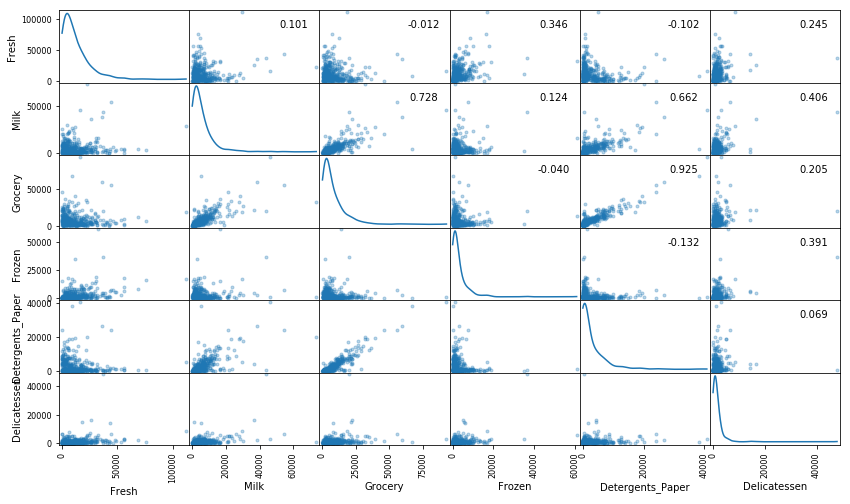

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

In [6]:
display(data.corr())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


**Answer:

The scatter matrix shows a high correlation between Detergents_Paper,Milk, and Grocery . This makes me aware that my chosen feature is relevant for identifying a customers' behavior and can help me gain further insight for model accuracy.
There seems to be a linear relationship between 'Grocery', 'Detergents_Paper', 'Fresh', and 'Milk'. The Data is not normally distributed and is also highly skewed(positively) . Outliers are inevitable.  
**

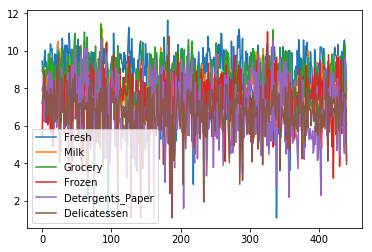

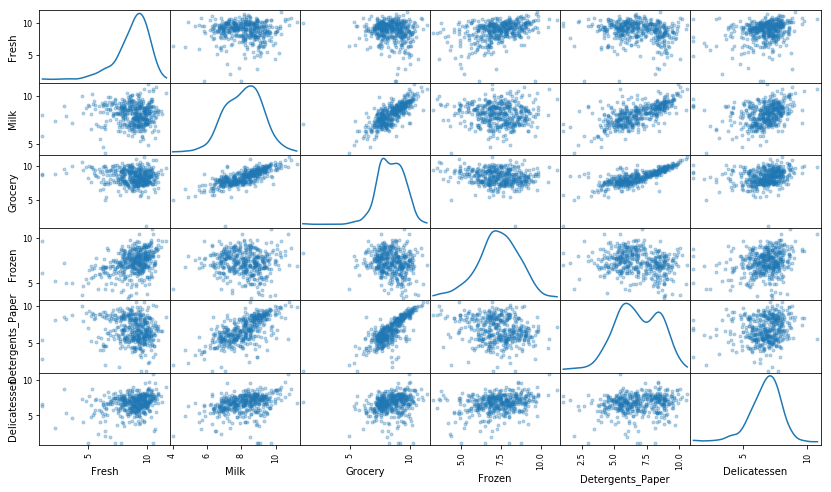

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
# plt.plot(log_data)
plt.plot(log_data)
plt.legend(log_data)
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [8]:
# Display the log-transformed sample data
display('samples',samples)
display('log natural samples',log_samples)

'samples'

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8590,3045,7854,96,4095,225
1,17160,1200,3412,2417,174,1136
2,4446,906,1238,3576,153,1014


'log natural samples'

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.058354,8.021256,8.968778,4.564348,8.317522,5.416100
1,9.750336,7.090077,8.135054,7.790282,5.159055,7.035269
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


In [9]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65,66,75,128,154,95,218,338,145,325,429,161,183,285,289]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

display(good_data)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740


In [10]:
min = np.min(good_data)
print('***min')
display(min)
max = np.max(good_data)
print('***max')
display(max)
print('***chosen outliers:')
display(outliers)
import collections
from collections import Counter
counter = Counter(good_data)
display(counter.most_common)

***min


Fresh               3.135494
Milk                4.718499
Grocery             5.384495
Frozen              3.218876
Detergents_Paper    1.609438
Delicatessen        1.098612
dtype: float64

***max


Fresh               11.627601
Milk                11.205013
Grocery             11.437986
Frozen              10.463360
Detergents_Paper    10.617099
Delicatessen         9.712509
dtype: float64

***chosen outliers:


[65, 66, 75, 128, 154, 95, 218, 338, 145, 325, 429, 161, 183, 285, 289]

<bound method Counter.most_common of Counter({'Delicatessen': 1, 'Fresh': 1, 'Detergents_Paper': 1, 'Milk': 1, 'Grocery': 1, 'Frozen': 1})>

**Answer:

Yes there are data points considered outliers but they should not be removed because they are most likely necessary for the learner to train. 

The outliers in multiple categories should be removed (data points:65,66,75,128,154)because they are outliers in more than one category , add no value to any predictive models, would only 'skew' the results..

'Fresh':removed points 66,95,218,338 because they are too small  .

'Milk':removed points 86 and 356, because these points are too large.

'Frozen':removed points 38,145,325,429, because these points are too large.

'Detergents_Paper': removed point 161, since this point is too small.

'Delicatessen':removed points 183,285,289 since these points are too large.

The outliers will affect results and assumptions.


**

pca samples: [-1.60676661  0.26701529  1.23095605  3.33920995  2.78328426  2.82682687
  4.8551749   4.10897111  3.92152324  4.29388414  4.26261228  4.89998515
  7.43156502  7.52936785  6.75568129  6.0085522   5.59776472  5.59703954]
variance: [ 0.46104867  0.72339251  0.8307359   0.92798405  0.97924173  1.        ]


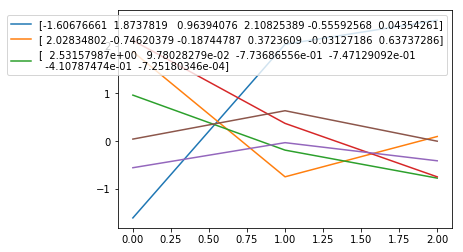

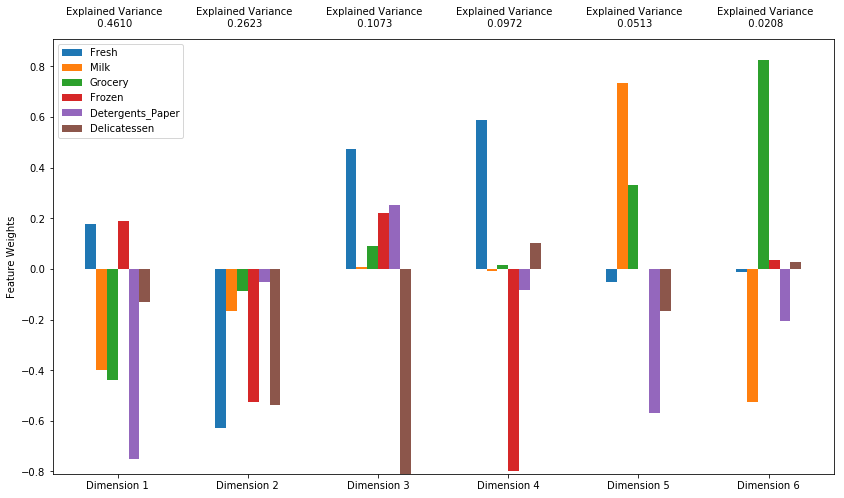

In [27]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)
plt.plot(pca_samples)
plt.legend(pca_samples)
# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
print('pca samples:',np.cumsum(pca_samples))
print('variance:',np.cumsum(pca.explained_variance_ratio_))

**Answer:

0.7233 variance in the data is explained in total by the first and second principal components.

0.9278 variance in the data is explained in total by the first four principal components.

The first principal component is correlated with fresh and frozen, and grocery making it more of a market.

The second principal component decreases with all features ,little to no spending in this dimension maybe personal shoppers or a local convenience store, instead of a restaurant/hotel,etc....

the third principal component is correlated with Fresh and detergents_paper increasing meaning this might be more of a restaurant.

In the fourth principal component when fresh increases, frozen decreases making it more of a deli.

**

In [29]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))
print(pca_results['Explained Variance'].cumsum())

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.6068,1.8738,0.9639,2.1083,-0.5559,0.0435
1,2.0283,-0.7462,-0.1874,0.3724,-0.0313,0.6374
2,2.5316,0.0978,-0.7737,-0.7471,-0.4108,-0.0007


Dimension 1    0.4610
Dimension 2    0.7233
Dimension 3    0.8306
Dimension 4    0.9278
Dimension 5    0.9791
Dimension 6    0.9999
Name: Explained Variance, dtype: float64


In [13]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)
# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = [ 'Dimension 1', 'Dimension 2'])
print('PCA samples\n',pca_samples,'\n\n reduced data \n',reduced_data[0:10])

PCA samples
 [[-1.60676661  1.8737819 ]
 [ 2.02834802 -0.74620379]
 [ 2.53157987  0.09780283]] 

 reduced data 
    Dimension 1  Dimension 2
0    -1.739988     0.078961
1    -1.745139    -0.852192
2    -1.806486    -1.715750
3     1.215568    -1.414578
4    -0.698430    -2.425206
5    -1.054780    -0.297127
6    -1.121274     0.347645
7    -1.517556    -0.951034
8    -0.859724     0.704247
9    -2.833123    -0.740372


In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.6068,1.8738
1,2.0283,-0.7462
2,2.5316,0.0978


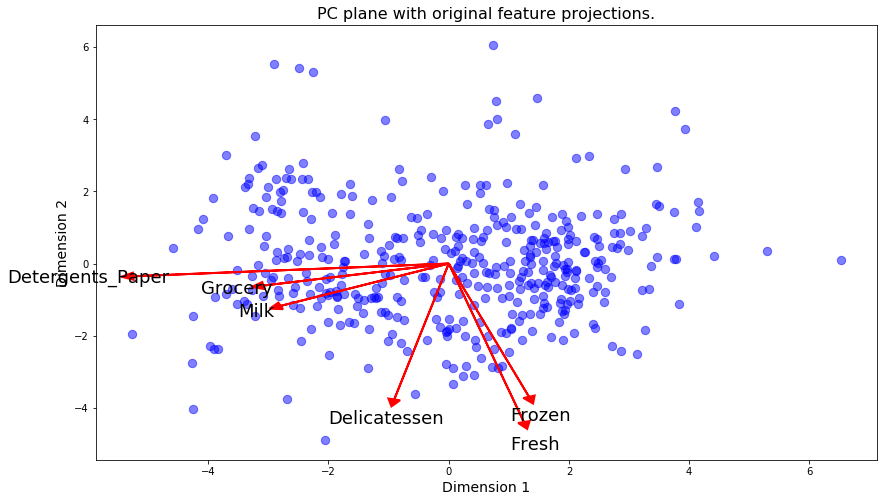

In [15]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

**Answer:

Hard clustering: Each point is assigned to a one cluster, we try to find K centroids  
soft clustering:Each point is assigned to all the clusters with different weights or probabilities, compute the weights

K-means advantages: clustering is easy to understand ,dominant patterns in the data are found by component distributions, placing the sample in the correct cluster.. K-Means also produces tighter clusters if the clusters are spherical.


I will use the K means clustering for it's simplicity even though GMM helps with some of the algorithms attributes explicitness.
It is  a quick way to reduce the data set to a small number of subsets.
**

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters = 2)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print('score:',score)


def scores(i):
    clusterer = KMeans(n_clusters=i).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data, preds) 
    return score

for i in [2,4,6,8,9,12]:
    print ("The silhouette score for", i, "clusters: {:.4f}".format(scores(i)))

score: 0.433221991703
The silhouette score for 2 clusters: 0.4332
The silhouette score for 4 clusters: 0.3357
The silhouette score for 6 clusters: 0.3642
The silhouette score for 8 clusters: 0.3518
The silhouette score for 9 clusters: 0.3635
The silhouette score for 12 clusters: 0.3604


**Answer:

Clusters 2 and 8 have the best scores


The silhouette score for 2 clusters: 0.4332

The silhouette score for 4 clusters: 0.3359

The silhouette score for 6 clusters: 0.3625

The silhouette score for 8 clusters: 0.3676

The silhouette score for 9 clusters: 0.3508

The silhouette score for 12 clusters: 0.3561



**

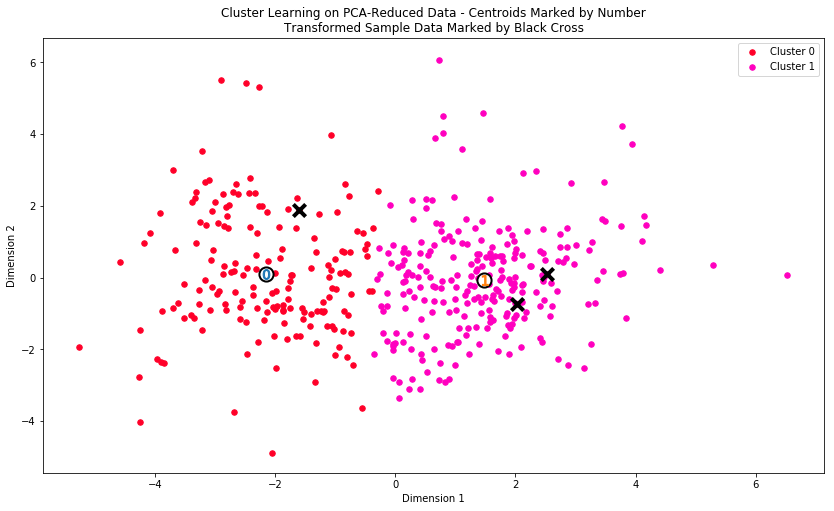

In [17]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [18]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print('true centers: \n')
display(true_centers)

true centers: 



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4203.0,7937.0,12075.0,951.0,4644.0,1000.0
Segment 1,8995.0,1914.0,2473.0,2090.0,307.0,687.0


**Answer:

Segment 0:
In this segment customers have  an above median spending on "Milk" and "Grocery",'Frozen' meaning that it could be a deli or a cafe.

Segment 1:
In this segment have customers have an above median spending on "Fresh", 'Milk', and 'Grocery', and Deter_Paper could be more of a the convenience store, market, restaurant.


**

Sample point 0 predicted to be in Cluster 0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8590,3045,7854,96,4095,225
1,17160,1200,3412,2417,174,1136
2,4446,906,1238,3576,153,1014


Sample point 1 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8590,3045,7854,96,4095,225
1,17160,1200,3412,2417,174,1136
2,4446,906,1238,3576,153,1014


Sample point 2 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8590,3045,7854,96,4095,225
1,17160,1200,3412,2417,174,1136
2,4446,906,1238,3576,153,1014


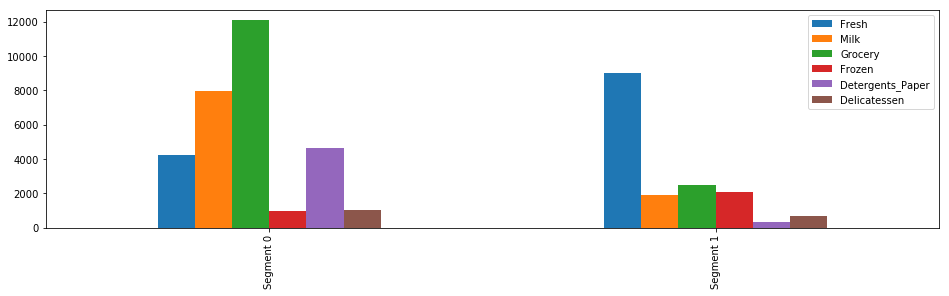

In [20]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)
    display(samples)
true_centers.plot(kind = 'bar', figsize = (16, 4))

**Answer: 

This confirms my intuition.

Sample 0: Predicted to be in cluster 1. Customers are spending more on "Milk" and "Grocery". 

Samples 1 and 2 are predicted to be in cluster 0. These customers are spending more on "Fresh" items.


**

**Answer:

Reducing the frequency of deliveries will generate risk of having establishments not getting the products needed on time, which would negatively benefit both segments, the company could start delivery on the 3 day/week schedule for a small percentage of their customers that need more fresh,milk,frozen products compared to establishments that aren't really buying them as much.
Then choose another set of customers and see how it will affect them..
An example would be to take customers from each segment and especially  the 'Fresh' B , to test the new delivery service on, because these are the features that most likely get ordered more because they tend to spoil easily. 

I can run multiple experiments at the same time, use the found statistics from variables into the  process until one experiment has the best outcome.


**

**Answer:

A decision tree classifier would be an appropriate classifier for identifying a new customer and place them into the appropriate customer segment(TARGET VARIABLE) based on the spending estimates given.

Once trained, it can be used to predict the customer segment for new customers which would then determine the most appropriate delivery service ((1) 3 days per week or (0) 5 days per week).

**

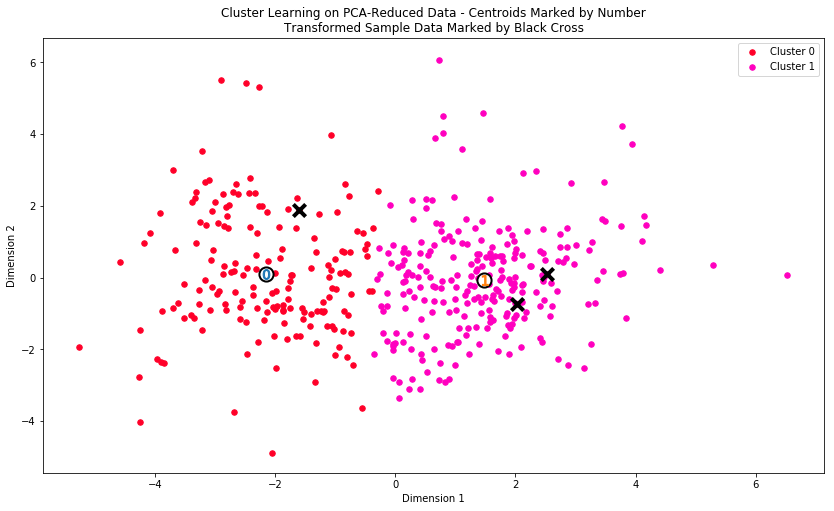

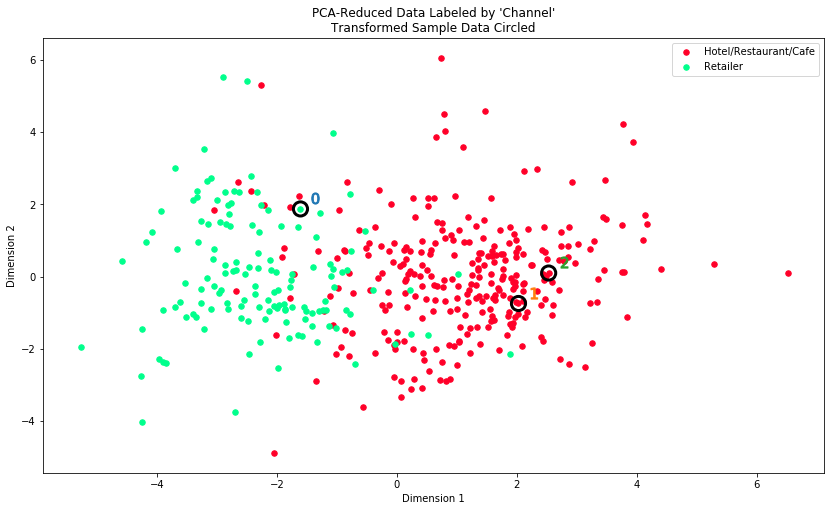

In [21]:
vs.cluster_results(reduced_data, preds, centers, pca_samples)

# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

In [24]:
#find percentage of correctly classified customers
data = pd.read_csv("customers.csv")
data = data.drop(data.index[outliers]).reset_index(drop = True)
# might need to switch around the 0 and 1, based on your cluster seed
df = np.where(data['Channel'] == 2, 0, 1)
print("Percentage of correctly classified customers: {:.2%}".format(sum(df == preds)/float(len(preds))))

Percentage of correctly classified customers: 89.18%


**Answer:

As shown, the clusters generated align well compared to the two segments present in the original data. Of course there are mislabeled points but those classified (Green points: Retailer, Red Points: Restaurants,cafe,hotel), help determine where to place the customer based on their spending. Doing this is important because it helps the data generalize better over the customers spending features so it does seem the classifier was able to keep the consistency in this model.

**